In [1]:
import os

os.chdir("../../")
os.listdir()

['src',
 'requirements.txt',
 'tests',
 '.pytest_cache',
 '.idea',
 '.githooks',
 '.git',
 'notebooks',
 '.pre-commit-config.yaml',
 'old_code',
 'data',
 'README.md',
 '.gitignore',
 'pytest.ini']

In [2]:
from torch.utils.data import Dataset
from argparse import Namespace
import torchvision.datasets as datasets
from src.utils.config import load_config_from_path, validate_config_structure
from src.utils.common_types import ConfigStructure
import torch
import matplotlib.pyplot as plt
from torchvision import transforms

In [3]:
mnist = datasets.MNIST(root="data/raw", train=True, download=True)

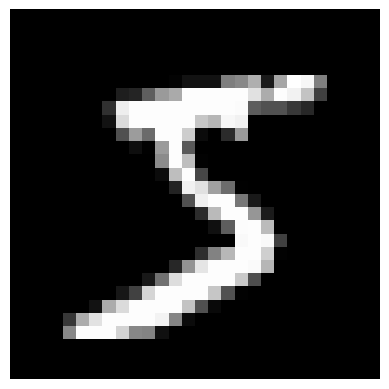

In [4]:
img = next(iter(mnist))

plt.imshow(img[0], cmap="gray")
plt.axis("off")
plt.show()

In [5]:
transform = transforms.ToTensor()
img_tensor = transform(img[0])

In [6]:
class FadeTransform:

    def __init__(self, threshold: float, kernel_size: int, sigma: float) -> None:
        self._threshold: float = threshold
        self._gaussian_blur: transforms.GaussianBlur = transforms.GaussianBlur(
            kernel_size=kernel_size, sigma=(sigma, sigma)
        )

    def __call__(self, img: torch.Tensor) -> torch.Tensor:
        # img = self._gaussian_blur(
        #     img
        # )  # .unsqueeze(0).unsqueeze(0)).squeeze(0).squeeze(0)
        img = (
            torch.clamp(img - self._threshold, min=0, max=1) * 1 / (1 - self._threshold)
        )
        # img = self._gaussian_blur(
        #     img
        # )  # .unsqueeze(0).unsqueeze(0)).squeeze(0).squeeze(0)
        return img

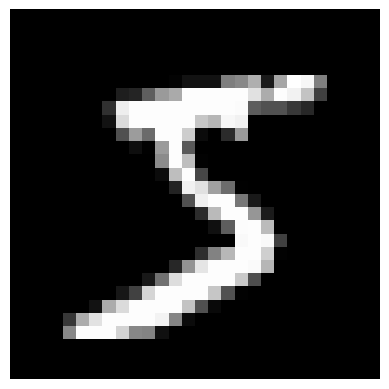

In [7]:
img_tensor_trans = FadeTransform(0.0, 3, 0.01)(img_tensor)
pil_image = transforms.ToPILImage()(
    img_tensor_trans / img_tensor_trans.max() * img_tensor.max()
)
plt.imshow(pil_image, cmap="gray")
plt.axis("off")
plt.show()

In [8]:
img_tensor_trans.max()

tensor(1.)

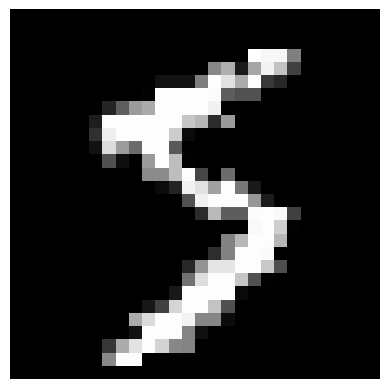

In [9]:
img_tensor_rot = transforms.RandomRotation([15, 15])(img_tensor)

pil_image = transforms.ToPILImage()(img_tensor_rot)

plt.imshow(pil_image, cmap="gray")
plt.axis("off")
plt.show()

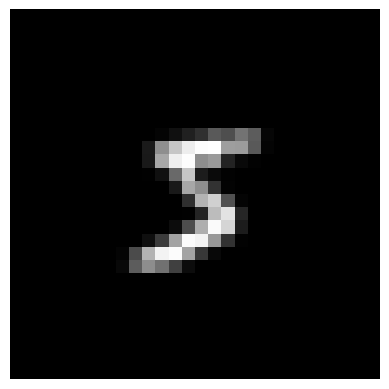

In [11]:
img_tensor_pad = transforms.functional.pad(
    transforms.functional.resize(img_tensor, size=(14, 14)), padding=[7, 7, 7, 7]
)
pil_image = transforms.ToPILImage()(img_tensor_pad)

plt.imshow(pil_image, cmap="gray")
plt.axis("off")
plt.show()